In [1]:
from keras.applications.densenet import DenseNet201
from keras.preprocessing import image
from keras.models import Model
from keras.applications.densenet import preprocess_input
import numpy as np
import random
from keras.models import Sequential
from keras import layers
from keras.layers import Dense,Flatten
from keras.layers import Conv2D, MaxPooling2D, Flatten
from tqdm import tqdm
import os
from PIL import Image
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from keras.optimizers import SGD
from sklearn.decomposition import PCA
from cv2 import cv2

## Step 1. Load the data set

In [2]:
def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".png":
            img = read(PATH)
            IMG.append(np.array(img))
    return IMG

In [3]:
benign = np.array(Dataset_loader('data/benign',224))
malign = np.array(Dataset_loader('data/malignant',224))

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 201.77it/s]


## Step 2. Data preprocessing

In [5]:
# Create labels
benign_label = np.zeros(len(benign))
malign_label = np.ones(len(malign))

# Merge data 
X = np.concatenate((benign, malign), axis = 0)
Y = np.concatenate((benign_label, malign_label), axis = 0)

# Shuffle data
s = np.arange(X.shape[0])
np.random.shuffle(s)

X = X[s]
Y = Y[s]

## Step 3. Validate data

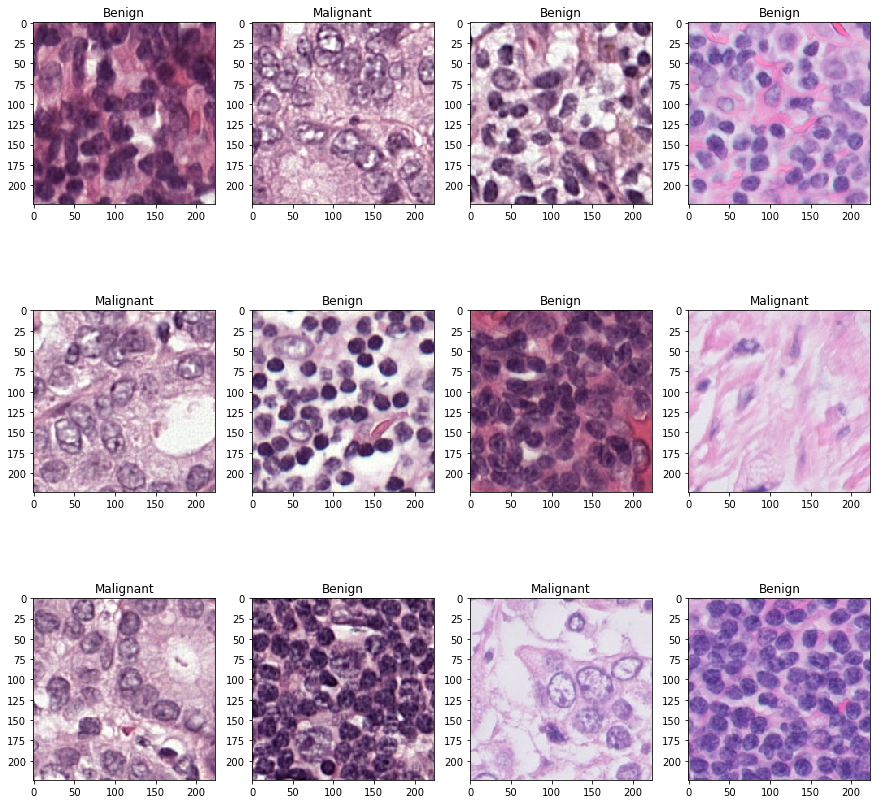

In [6]:
width = 60
height = 40
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

for i in range(10, columns*rows+10):
    ax = fig.add_subplot(rows, columns, i-9)
    if Y[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X[i], interpolation='nearest')
plt.show()

## Step 4. Split the data set into 2 different sizes

In [7]:
#the larger data set: 800 training data & 200 testing data
X_800_train = X[:800]
X_800_test = X[800:]
Y_800_train = Y[:800]
Y_800_test = Y[800:]

In [8]:
#the smaller data set: 200 training data & 50 testing data
X_200_train = X[:200]
X_200_test = X[950:]
Y_200_train = Y[:200]
Y_200_test = Y[950:]

# 1. LeNet

In [9]:
model_le = Sequential()
 

model_le.add(Conv2D(filters=6, kernel_size=(5,5), padding='valid', input_shape=(224, 224, 3), activation='tanh'))
model_le.add(MaxPooling2D(pool_size=(2,2)))
model_le.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='tanh'))
model_le.add(MaxPooling2D(pool_size=(2,2)))
 
# Flatten layers and dense layers
model_le.add(Flatten())
model_le.add(Dense(120, activation='tanh'))
model_le.add(Dense(84, activation='tanh'))
model_le.add(Dense(2, activation='softmax'))

# Optimizer
sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)
 
model_le.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 6)       456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 16)      2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 44944)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               5393400   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [10]:
model_le.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

### (1) on the larger data set

In [11]:
#training $ testing & evaluating
model_le.fit(X_800_train, Y_800_train, batch_size=20, epochs=10, verbose=1, shuffle=False)

#plot_model(model_le, to_file='model.png', show_shapes=True, show_layer_names=False)

model_le.evaluate(X_800_test, Y_800_test)

Epoch 1/10
40/40 [==============================] - 18s 460ms/step - loss: 0.8932 - accuracy: 0.4963
Epoch 2/10
40/40 [==============================] - 18s 451ms/step - loss: 0.6932 - accuracy: 0.5063
Epoch 3/10
40/40 [==============================] - 18s 459ms/step - loss: 0.6931 - accuracy: 0.5063
Epoch 4/10
40/40 [==============================] - 19s 468ms/step - loss: 0.6931 - accuracy: 0.4325
Epoch 5/10
40/40 [==============================] - 18s 457ms/step - loss: 0.6931 - accuracy: 0.4375
Epoch 6/10
40/40 [==============================] - 18s 452ms/step - loss: 0.6931 - accuracy: 0.4437
Epoch 7/10
40/40 [==============================] - 18s 460ms/step - loss: 0.6931 - accuracy: 0.4137
Epoch 8/10
40/40 [==============================] - 18s 449ms/step - loss: 0.6931 - accuracy: 0.4300
Epoch 9/10
40/40 [==============================] - 17s 437ms/step - loss: 0.6931 - accuracy: 0.4275
Epoch 10/10
7/7 [==============================] - 1s 182ms/step - loss: 0.6931 - accuracy:

[0.6931469440460205, 0.4399999976158142]

### (2) on the smaller data set

In [12]:
#training $ testing & evaluating
model_le.fit(X_200_train, Y_200_train, batch_size=20, epochs=10, verbose=1, shuffle=False)

#plot_model(model_le, to_file='model.png', show_shapes=True, show_layer_names=False)

model_le.evaluate(X_200_test, Y_200_test)

Epoch 1/10
10/10 [==============================] - 5s 480ms/step - loss: 0.6931 - accuracy: 0.4450
Epoch 2/10
10/10 [==============================] - 5s 451ms/step - loss: 0.6931 - accuracy: 0.4650
Epoch 3/10
10/10 [==============================] - 4s 430ms/step - loss: 0.6931 - accuracy: 0.4150
Epoch 4/10
10/10 [==============================] - 4s 427ms/step - loss: 0.6931 - accuracy: 0.4050
Epoch 5/10
10/10 [==============================] - 4s 419ms/step - loss: 0.6931 - accuracy: 0.4400
Epoch 6/10
10/10 [==============================] - 5s 452ms/step - loss: 0.6931 - accuracy: 0.4800
Epoch 7/10
10/10 [==============================] - 4s 444ms/step - loss: 0.6931 - accuracy: 0.4800
Epoch 8/10
10/10 [==============================] - 5s 503ms/step - loss: 0.6931 - accuracy: 0.4750
Epoch 9/10
10/10 [==============================] - 5s 461ms/step - loss: 0.6931 - accuracy: 0.4100
Epoch 10/10
2/2 [==============================] - 0s 68ms/step - loss: 0.6931 - accuracy: 0.4200


[0.6931469440460205, 0.41999998688697815]

## Feature Extraction

In [13]:
base_model = DenseNet201(weights='imagenet', include_top=True)
model_dense = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

In [14]:
# feature extraction from training data1
X_800_train_fea = X_800_train
X_800_train_fea = preprocess_input(X_800_train_fea)
X_800_train_fea = model_dense.predict(X_800_train_fea)
print(X_800_train_fea.shape)

(800, 1920)


In [15]:
# feature extraction from testing data1
X_800_test_fea = X_800_test
X_800_test_fea = preprocess_input(X_800_test_fea)
X_800_test_fea = model_dense.predict(X_800_test_fea)
print(X_800_test_fea.shape)

(200, 1920)


In [16]:
# feature extraction from training data2
X_200_train_fea = X_200_train
X_200_train_fea = preprocess_input(X_200_train_fea)
X_200_train_fea = model_dense.predict(X_200_train_fea)
print(X_200_train_fea.shape)

(200, 1920)


In [17]:
# feature extraction from testing data2
X_200_test_fea = X_200_test
X_200_test_fea = preprocess_input(X_200_test_fea)
X_200_test_fea = model_dense.predict(X_200_test_fea)
print(X_200_test_fea.shape)

(50, 1920)


### Dimension Reduction

In [18]:
#200 features
pca = PCA(n_components=200)
X_800_train_fea2= pca.fit_transform(X_800_train_fea)
X_800_test_fea2= pca.fit_transform(X_800_test_fea)

In [19]:
#50 features
pca = PCA(n_components=50)
X_800_train_fea3= pca.fit_transform(X_800_train_fea)
X_800_test_fea3= pca.fit_transform(X_800_test_fea)

# 2. DenseNet

In [20]:
# model establishing
model_1 = Sequential()
model_1.add(Flatten(input_shape=(1920,)))
model_1.add(Dense(200,activation='relu'))
model_1.add(Dense(50,activation='relu'))
model_1.add(Dense(2,activation='sigmoid'))
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               384200    
_________________________________________________________________
dense_4 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 102       
Total params: 394,352
Trainable params: 394,352
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

### (1) on the larger data set

In [22]:
# training & testing & evaluating

model_1.fit(x=X_800_train_fea,y=Y_800_train, epochs=10)

model_1.evaluate(X_800_test_fea, Y_800_test)

Epoch 1/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1646 - accuracy: 0.9513
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9862
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9912
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9925
Epoch 5/10
25/25 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.99 - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9950
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9950
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9950
Epoch 8/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0141 - accuracy: 0.9975
Epoch 9/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0093 - accuracy: 0.9975
Epoch 10/10
7/7 [==============================] - 0s 1ms/step - loss: 0.050

[0.05053300783038139, 0.9800000190734863]

### (2) on the smaller data set

In [23]:
# training & testing & evaluating

model_1.fit(x=X_200_train_fea,y=Y_200_train, epochs=10)

model_1.evaluate(X_200_test_fea, Y_200_test)

Epoch 1/10
7/7 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 8.7175e-04 - accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 4.4532e-04 - accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 3.6121e-04 - accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 3.0969e-04 - accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 2.6378e-04 - accuracy: 1.0000
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 2.4085e-04 - accuracy: 1.0000
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2286e-04 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 0s 997us/step - loss: 0.0566 - accuracy: 0.9600


[0.05662937089800835, 0.9599999785423279]

### (3) dimension reduction: 200 features

In [24]:
# model establishing
model_2 = Sequential()
model_2.add(Flatten(input_shape=(200,)))
model_2.add(Dense(200,activation='relu'))
model_2.add(Dense(50,activation='relu'))
model_2.add(Dense(2,activation='sigmoid'))
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 102       
Total params: 50,352
Trainable params: 50,352
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [26]:
# training & testing & evaluating

model_2.fit(x=X_800_train_fea2,y=Y_800_train, epochs=10)

model_2.evaluate(X_800_test_fea2, Y_800_test)

Epoch 1/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2721 - accuracy: 0.9150
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9912
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9950
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 0.9975
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 9.5283e-04 - accuracy: 1.0000
Epoch 10/10
7/7 [==============================] - 0s 997us/step - loss: 0.1024 - accuracy: 0.9750


[0.1023852750658989, 0.9750000238418579]

###  (4) dimension reduction: 50 features

In [27]:
# model establishing
model_3 = Sequential()
model_3.add(Flatten(input_shape=(50,)))
model_3.add(Dense(200,activation='relu'))
model_3.add(Dense(50,activation='relu'))
model_3.add(Dense(2,activation='sigmoid'))
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               10200     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 102       
Total params: 20,352
Trainable params: 20,352
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_3.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [29]:
# training, testing , and model evaluation

model_3.fit(x=X_800_train_fea3,y=Y_800_train, epochs=10)

model_3.evaluate(X_800_test_fea3, Y_800_test)

Epoch 1/10
25/25 [==============================] - 0s 1ms/step - loss: 0.3259 - accuracy: 0.8662
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9862
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0222 - accuracy: 0.9950
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 0.9962
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0116 - accuracy: 0.9975
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 0.9975
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 0.9975
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0060 - accuracy: 0.9975
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 0.9975
Epoch 10/10
7/7 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 0.9850


[0.09527479112148285, 0.9850000143051147]

# 3. SVM

In [30]:
clf = SVC(random_state=0, max_iter=10)

### (1) on a larger data set

In [31]:
clf.fit(X_800_train_fea, Y_800_train)
prediction1 = clf.predict(X_800_test_fea)
print(classification_report(Y_800_test, prediction1))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        97
         1.0       0.98      0.96      0.97       103

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


### (2) on a smaller data set

In [32]:
clf.fit(X_200_train_fea, Y_200_train)
prediction2 = clf.predict(X_200_test_fea)
print(classification_report(Y_200_test, prediction2))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        22

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


### (3) dimension reduction: 200 features

In [33]:
clf.fit(X_800_train_fea2, Y_800_train)
prediction3 = clf.predict(X_800_test_fea2)
print(classification_report(Y_800_test, prediction3))

              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91        97
         1.0       0.99      0.83      0.90       103

    accuracy                           0.91       200
   macro avg       0.92      0.91      0.90       200
weighted avg       0.92      0.91      0.90       200



D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


### (4) dimension reduction: 50 features

In [34]:
clf.fit(X_800_train_fea3, Y_800_train)
prediction4 = clf.predict(X_800_test_fea3)
print(classification_report(Y_800_test, prediction4))

              precision    recall  f1-score   support

         0.0       0.76      0.98      0.86        97
         1.0       0.97      0.71      0.82       103

    accuracy                           0.84       200
   macro avg       0.87      0.84      0.84       200
weighted avg       0.87      0.84      0.84       200



D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


# Detection

In [106]:
patch=[]
pic_path = 'cancer/test1.png' 
pic_target = 'cancer/result/' 

seg_width = 224
seg_length = 224

picture = cv2.imread(pic_path)
(width, length, depth) = picture.shape

pic = np.zeros((seg_width, seg_length, depth))

num_width = int(width / seg_width)
num_length = int(length / seg_length)

for i in range(0, num_width):
    for j in range(0, num_length):
        pic = picture[i * seg_width : (i+1) * seg_width, j * seg_length : (j+1) * seg_length, :]      
        result_path = pic_target + '{}_{}.png'.format(i+1, j+1)
        cv2.imwrite(result_path, pic)
        img = cv2.imread(result_path)
        patch.append(np.array(img))
        
print("The original image has been segmented")

Done


In [116]:
patch=np.array(patch)
type(patch)

numpy.ndarray

In [117]:
print(patch)

[[[[145  98 141]
   [138  91 132]
   [138  94 131]
   ...
   [208 181 222]
   [199 169 208]
   [160 126 165]]

  [[142 104 148]
   [128  90 130]
   [136 103 137]
   ...
   [203 175 218]
   [199 169 209]
   [161 128 165]]

  [[142 109 151]
   [120  85 124]
   [135 105 137]
   ...
   [199 170 214]
   [196 166 207]
   [166 129 171]]

  ...

  [[ 95  56  86]
   [ 98  55  92]
   [106  62 103]
   ...
   [114  81 126]
   [129  90 137]
   [152 115 154]]

  [[121  79 113]
   [132  94 126]
   [133  97 128]
   ...
   [131  94 142]
   [149 112 157]
   [168 132 172]]

  [[127  89 128]
   [143 105 140]
   [144 104 137]
   ...
   [142 108 152]
   [163 130 172]
   [179 142 180]]]


 [[[136  98 136]
   [128  91 128]
   [141 108 147]
   ...
   [111  75 109]
   [108  71 109]
   [112  75 112]]

  [[136 101 137]
   [127  91 127]
   [139 104 141]
   ...
   [109  65  98]
   [110  65 102]
   [108  69 105]]

  [[141 103 144]
   [129  89 129]
   [136  93 134]
   ...
   [101  57  92]
   [104  59  97]
   [104  64

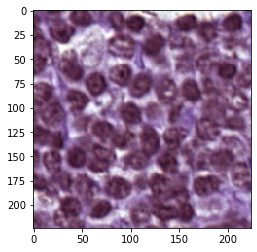

In [112]:
plt.imshow(patch[2], interpolation='nearest')
plt.show()

In [118]:
patch_fea = patch
patch_fea = preprocess_input(patch_fea)
patch_fea = model_dense.predict(patch_fea)
print(patch_fea.shape)

(360, 1920)


In [119]:
x = model_1.predict(patch_fea)
print(x.shape)

(360, 2)


In [122]:
num_cancer_list=[]
for i in range (len(x)):
    if (x[i][0]<x[i][1]):
        num_cancer_list.append(i)

In [124]:
# Store the image
pic_path = 'cancer/result/'
pic_target = 'cancer/picture/'

num_width_list = []
num_lenght_list = []

picture_names =  os.listdir(pic_path)
if len(picture_names)==0:
    print("There is no such file")
 
else:
    
    img_1_1 = cv2.imread(pic_path + '1_1.png')
    (width, length, depth) = img_1_1.shape
    
    for picture_name in picture_names:
        num_width_list.append(int(picture_name.split("_")[0]))
        num_lenght_list.append(int((picture_name.split("_")[-1]).split(".")[0]))
    
    num_width = max(num_width_list)
    num_length = max(num_lenght_list)
    
    splicing_pic = np.zeros((num_width*width, num_length*length, depth))
    splicing_mask = np.zeros((num_width*width, num_length*length, depth))
    
    for i in range(1, num_width+1):
        for j in range(1, num_length+1):
            img_part = cv2.imread(pic_path + '{}_{}.png'.format(i, j))
            if (((i-1)*num_length + j - 1) in num_cancer_list):
                img_mask = np.ones((224, 224, 3))
                img_mask *= 255
            else:
                img_mask = np.zeros((224, 224, 3))
            splicing_pic[width*(i-1) : width*i, length*(j-1) : length*j, :] = img_part
            splicing_mask[width*(i-1) : width*i, length*(j-1) : length*j, :] = img_mask
    
    cv2.imwrite(pic_target + 'result.png', splicing_pic)
    cv2.imwrite(pic_target + 'mask.png', splicing_mask)
    print("Done")

num_width:
20
num_length:
18
Done


In [135]:
def test():
    
    img1 = cv2.imread("cancer/picture/pic/1.png")
    img2 = cv2.imread("cancer/picture/mask/1.png" )

    alpha = 0.9
    meta = 1 - alpha
    gamma = 0
    image = cv2.addWeighted(img1, alpha, img2, meta, gamma)

    # cv2.imshow('image', image)

    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.imwrite("cancer/picture/test_mask.png", image)

test()

